In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
cust_df = pd.read_csv("/home/sadabrata/Datasets/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
cust_df.shape

(850, 10)

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [5]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
df.shape

(850, 9)

In [7]:
#Normalizing
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
print("Clus_dataSet shape",Clus_dataSet.shape)
Clus_dataSet

Clus_dataSet shape (850, 8)


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [8]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
labels

array([2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0,
       1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2,

In [9]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [10]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


In [11]:
df['Clus_km'].value_counts()

2    537
0    166
1    147
Name: Clus_km, dtype: int64

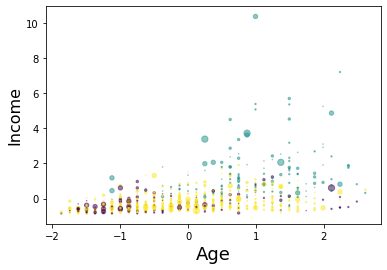

In [12]:
area = np.pi * ( Clus_dataSet[:, 1])**2  
plt.scatter(Clus_dataSet[:, 0], Clus_dataSet[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

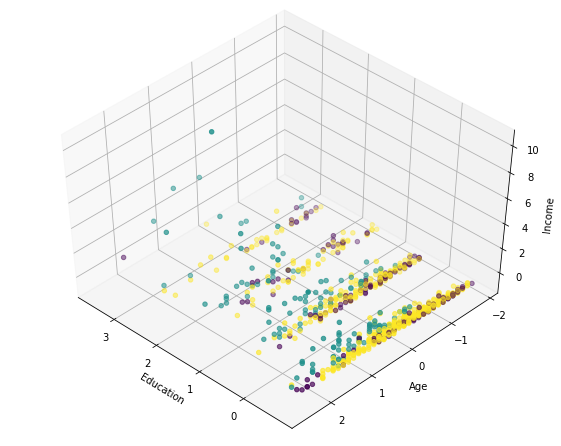

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(Clus_dataSet[:, 1], Clus_dataSet[:, 0], Clus_dataSet[:, 3], c= labels.astype(np.float))

In [14]:
cluster_centre = k_means.cluster_centers_
cluster_centre

array([[-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01]])

In [29]:
label2_customers=df[df['Clus_km']==2] #nba[nba["year_id"] > 2010]

In [30]:
label2_customers['Customer Id']

0        1
3        4
6        7
7        8
8        9
      ... 
843    844
844    845
845    846
846    847
848    849
Name: Customer Id, Length: 537, dtype: int64